### Building A Machine Learning Model To Determne The Unit Sales Of Each Product In Corporation Favorita Stores ###

# Business Understanding

***Essence of the case:***
    
>Build a predictive model that lets us know the unit sales of each product the Corporation Favorita franchise makes in its different stores across columbia.

# Data Understanding 

***What Analysis can we do?***

>Store transactions per date

>store number with the most product sales (top 10)

>Product family with the most requests or sales (top 10)

>Mostpromoted product family (either top 5 or 10)

>top stores with the most sales based on promotions

>top products recording the most sales based on promotions

>highest transacting stores (top 10)

>time frames with the highest transactions

>cities and states with the highest transactions

>cities and states with the highest promotions

>cities and states with the highest sales

>shop clusters with the highest promotion events

>shop custers with the highest transactions

>shop clusters with the highest sales

>does oil price and holiday even cause an increase in the pertronage of a commodity based on store location, cluster and region
>
does oil price and holiday affect the rate of transaction


***Hypothesis:***
1.  Promotions positively impacts the sales of each cluster of stores
2.  Oil prices negatively impacts sales
3.  Holiday periods positively impact sales
4.  Regardless of store certain product families always outsell others
5.  Oil price negatively affects the rate of transaction
6.  Holidays and promotions drive transaction rates positvely
7.  During specific time periods, certain stores record high transactions and sales
8.  Depending on location, certain stores are outselling other stores


***Questions:***
1.  Does promotion result in more sales in each cluster of store?
2.  Does Oil price negatively affect the sales in each cluster of store?
3.  what are the top 10 most pertronized product families being offered by favorita?
4.  Does oil price result in low transaction rates in each of the cluster of stores?
5.  Collectively, does holidays and promotions result in high transaction rates in each cluster of store?
6.  Which dates have the lowest and highest sales for each year?
7.  Does location result in certain cluster of stores putselling others?

8.  Are certain groups of stores (cluster, city, state, type) selling more products?
9.  Did the earthquake impact sales?
10. Is the train dataset complete (has all the required dates)?
11. Are sales affected by promotions, oil prices and holidays?
12. What analysis can we get from the date and its extractable features?
13. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

# Data Preparation

***Steps***
1. Load all data files into the notebook
2. Examine their features
3. Identify the sections of the dataframes with missing and null values, and those with wrong data formats.
4. Work on the missing and null values, and wrong data formats
5. Derive final dataframes for data processing and visulization.

# Steps

1. Load the train data set CSV files into the notebook
2. Go through all the columns of the train data to verify if they are complete and in their right formats
3. if not, conduct the necessary edits/cleaning to ensure a uniform dataframe
4. Afterwards, I am to load the supplementary csv files which i will need for my analysis, and clean them
5. DO the necessary combinations and proceed to visualization to answer the set questions.

***Import the libraries to be used***

In [1]:
#Import Libraries
from itertools import product
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

***Import the datasets here*** 

In [2]:
# Load the training dataset here

df_train = pd.read_csv("/Users/Ebenezer Edusei/Edusei Python Studies/ML Study/post-bap-LP2-main/train.csv")
df_test = pd.read_csv("/Users/Ebenezer Edusei/Edusei Python Studies/ML Study/post-bap-LP2-main/test.csv")
Oil = pd.read_csv("/Users/Ebenezer Edusei/Edusei Python Studies/ML Study/post-bap-LP2-main/oil.csv")
holidays = pd.read_csv("/Users/Ebenezer Edusei/Edusei Python Studies/ML Study/post-bap-LP2-main/holidays_events.csv")
transactions = pd.read_csv("/Users/Ebenezer Edusei/Edusei Python Studies/ML Study/post-bap-LP2-main/transactions.csv")
stores = pd.read_csv(r"C:\Users\Ebenezer Edusei\Edusei Python Studies\ML Study\post-bap-LP2-main\stores.csv")


# Step 2: Go through all the columns of the train data to verify if they are complete and in their right formats

***Exploring the Train Data***

In [3]:
df_train.notnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype
---  ------       -----
 0   id           bool 
 1   date         bool 
 2   store_nbr    bool 
 3   family       bool 
 4   sales        bool 
 5   onpromotion  bool 
dtypes: bool(6)
memory usage: 17.2 MB


In [4]:
# the '.sort_values' was used to sort the data in decending order based on column names. In this case promotion was used
df_train.sort_values('onpromotion',ascending=False)

,id,date,store_nbr,family,sales,onpromotion
2216622,2216622,2016-05-31,53,GROCERY I,7517.0,741
2200584,2200584,2016-05-22,53,GROCERY I,6044.0,726
2211276,2211276,2016-05-28,53,GROCERY I,5846.0,722
2188110,2188110,2016-05-15,53,GROCERY I,6154.0,720
2213058,2213058,2016-05-29,53,GROCERY I,6681.0,719
...,...,...,...,...,...,...
969637,969637,2014-06-30,15,SCHOOL AND OFFICE SUPPLIES,0.0,0
969638,969638,2014-06-30,15,SEAFOOD,17.0,0
969640,969640,2014-06-30,16,BABY CARE,0.0,0
969641,969641,2014-06-30,16,BEAUTY,0.0,0


***Exploring the Test Data***

In [5]:
df_test.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           28512 non-null  bool 
 1   date         28512 non-null  bool 
 2   store_nbr    28512 non-null  bool 
 3   family       28512 non-null  bool 
 4   onpromotion  28512 non-null  bool 
dtypes: bool(5)
memory usage: 139.3 KB


***Exploring the Oil Data set***

In [6]:
Oil.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   date        1218 non-null   bool 
 1   dcoilwtico  1218 non-null   bool 
dtypes: bool(2)
memory usage: 2.5 KB


In [7]:
Oil.nunique()

date          1218
dcoilwtico     998
dtype: int64

In [8]:
# creating bool series True for NaN values
bool_series = pd.isnull(Oil["dcoilwtico"])
   
# filtering data
# displaying data only with oil values = NaN
Oil[bool_series]


,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


***Exploring the Holidays Dataset***

In [8]:
holidays.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   date         350 non-null    bool 
 1   type         350 non-null    bool 
 2   locale       350 non-null    bool 
 3   locale_name  350 non-null    bool 
 4   description  350 non-null    bool 
 5   transferred  350 non-null    bool 
dtypes: bool(6)
memory usage: 2.2 KB


***Exploring the Transactions Dataset***

In [9]:
transactions.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   date          83488 non-null  bool 
 1   store_nbr     83488 non-null  bool 
 2   transactions  83488 non-null  bool 
dtypes: bool(3)
memory usage: 244.7 KB


In [10]:
transactions.nunique()

date            1682
store_nbr         54
transactions    4993
dtype: int64

In [11]:
# creating bool series True for NaN values
bool_series1 = pd.isnull(transactions["transactions"])
   
# filtering data
# displaying data only with oil values = NaN
transactions[bool_series1]


,date,store_nbr,transactions


***Exploring the Stores Dataset***

In [12]:
stores.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   store_nbr  54 non-null     bool 
 1   city       54 non-null     bool 
 2   state      54 non-null     bool 
 3   type       54 non-null     bool 
 4   cluster    54 non-null     bool 
dtypes: bool(5)
memory usage: 398.0 bytes


In [13]:
stores.nunique()

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

In [14]:
# creating bool series True for NaN values
bool_series2 = pd.isnull(stores["type"])
   
# filtering data
# displaying data only with oil values = NaN
stores[bool_series2]


,store_nbr,city,state,type,cluster


# Conclusion of Step 2

***Complete DataSets***
>Stores, Transacions and Holidays had the data in their respective dataframes complete. Next, certain columns will have to have their formats edited

***Incomplete Datasets***


# Step 3: Conduct the necessary edits/cleaning to ensure dataframe columns have values in the right format.

# Incomplete Datasets

>***Question 1***: Is the train dataset complete (has all the required dates)?

In [15]:
#"it seems that the df_train does not have any null values. \ 
#so we will check each column to ascertain the unique values.
#Check for ID
df_train.id.nunique(), df_train.store_nbr.nunique(), df_train.family.nunique(), df_train.date.nunique(), df_train.sales.nunique(), df_train.onpromotion.nunique()

(3000888, 54, 33, 1684, 379610, 362)

In [16]:
#converting the info in the date column into date and casting it into a new column called sales date
df_train["sales_date"] = pd.to_datetime(df_train["date"]).dt.date
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   sales_date   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 160.3+ MB


In [17]:
#identifying the minimum and maximum values in the date column in a proper DateTime format to be used for analysis
df_train.sales_date.min(), df_train.sales_date.max()

(datetime.date(2013, 1, 1), datetime.date(2017, 8, 15))

In [18]:
#verify the completeness of the dates column
#to do that we would have to subtract the maximum dtae from the minimum date to obtain the total number  of dates for further analysis.

## Expected Number of Days from our dataset
dif = (df_train["sales_date"].max() - df_train["sales_date"].min())

dif.days + 1, df_train["sales_date"].nunique()

(1688, 1684)

***Inputting the Missing Dates with their respective values into the date column***

In [19]:
expected_dates = pd.date_range(start=df_train["sales_date"].min(), end=df_train["sales_date"].max())
expected_dates.date

array([datetime.date(2013, 1, 1), datetime.date(2013, 1, 2),
       datetime.date(2013, 1, 3), ..., datetime.date(2017, 8, 13),
       datetime.date(2017, 8, 14), datetime.date(2017, 8, 15)],
      dtype=object)

In [20]:
set(expected_dates.date) - set(df_train["sales_date"].reindex())

{datetime.date(2013, 12, 25),
 datetime.date(2014, 12, 25),
 datetime.date(2015, 12, 25),
 datetime.date(2016, 12, 25)}

In [21]:
pd.to_datetime('now')

C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Timestamp('2022-10-17 21:44:37.573609')

In [22]:
test_expected_dates= np.append(expected_dates.date, pd.to_datetime('now').date())

In [23]:
test_expected_dates

array([datetime.date(2013, 1, 1), datetime.date(2013, 1, 2),
       datetime.date(2013, 1, 3), ..., datetime.date(2017, 8, 14),
       datetime.date(2017, 8, 15), datetime.date(2022, 10, 17)],
      dtype=object)

In [24]:
set(test_expected_dates) - set(df_train["sales_date"].unique())

{datetime.date(2013, 12, 25),
 datetime.date(2014, 12, 25),
 datetime.date(2015, 12, 25),
 datetime.date(2016, 12, 25),
 datetime.date(2022, 10, 17)}

***Inference:***
>From the above it is evident that the train dataset contained missing dates which will have to be derived and added to the train dataframe to ensure its completeness.

***Adding the Omitted DataFrames***

>Codes & Steps for combining the omitted dates with the unique sotres and family and adding it to the main df
>>We will use the  'from itertools import product' to create variables consisting of the missing dates, unique store and unique product families, create a list called 'missing_data' and cast it into a df variable called TBA(to-be-added). TBA will then bemerged with the main df to obtain a complete df with all dates intact.

In [25]:
"""create variables called missing dates, unique_stores and unique_family /
to store the difference between the expected number of dates and the actual number of dates,
the unique store numbers and product families (categories) respectively"""
missing_dates = set(test_expected_dates) - set(df_train["sales_date"].unique())
unique_stores = df_train.store_nbr.unique()
unique_family = df_train.family.unique() 

missing_data = list(product(missing_dates, unique_stores, unique_family))
#missing_data

#TBA = To Be Added
TBA = pd.DataFrame(missing_data, columns = ['sales_date', 'store_nbr', 'family'])
TBA

,sales_date,store_nbr,family
0,2022-10-17,1,AUTOMOTIVE
1,2022-10-17,1,BABY CARE
2,2022-10-17,1,BEAUTY
3,2022-10-17,1,BEVERAGES
4,2022-10-17,1,BOOKS
...,...,...,...
8905,2016-12-25,9,POULTRY
8906,2016-12-25,9,PREPARED FOODS
8907,2016-12-25,9,PRODUCE
8908,2016-12-25,9,SCHOOL AND OFFICE SUPPLIES


In [26]:
# Combine the df containing the missing dates with the origional dataframe
train_merged = pd.concat([TBA, df_train], ignore_index=False)
train_merged

,sales_date,store_nbr,family,id,date,sales,onpromotion
0,2022-10-17,1,AUTOMOTIVE,NaN,NaN,NaN,NaN
1,2022-10-17,1,BABY CARE,NaN,NaN,NaN,NaN
2,2022-10-17,1,BEAUTY,NaN,NaN,NaN,NaN
3,2022-10-17,1,BEVERAGES,NaN,NaN,NaN,NaN
4,2022-10-17,1,BOOKS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,3000883.0,2017-08-15,438.133,0.0
3000884,2017-08-15,9,PREPARED FOODS,3000884.0,2017-08-15,154.553,1.0
3000885,2017-08-15,9,PRODUCE,3000885.0,2017-08-15,2419.729,148.0
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,3000886.0,2017-08-15,121.000,8.0


***Dropping Unwanted Columns and Doing value convertions ***

In [27]:
train_comp = train_merged.drop(['id', 'date'], axis=1)
train_comp

,sales_date,store_nbr,family,sales,onpromotion
0,2022-10-17,1,AUTOMOTIVE,NaN,NaN
1,2022-10-17,1,BABY CARE,NaN,NaN
2,2022-10-17,1,BEAUTY,NaN,NaN
3,2022-10-17,1,BEVERAGES,NaN,NaN
4,2022-10-17,1,BOOKS,NaN,NaN
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0.0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1.0
3000885,2017-08-15,9,PRODUCE,2419.729,148.0
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8.0


In [28]:
#Replacing all the missing values in the sales and promotion column
train_comp['sales'] = train_comp['sales'].replace(np.nan, 0)
train_comp['onpromotion'] = train_comp['onpromotion'].replace(np.nan, 0)

#Convert 'price' column from float to int
train_comp['sales'] = train_comp['sales'].astype(int)
train_comp['onpromotion'] = train_comp['onpromotion'].astype(int)

In [29]:
train_comp.drop_duplicates()

,sales_date,store_nbr,family,sales,onpromotion
0,2022-10-17,1,AUTOMOTIVE,0,0
1,2022-10-17,1,BABY CARE,0,0
2,2022-10-17,1,BEAUTY,0,0
3,2022-10-17,1,BEVERAGES,0,0
4,2022-10-17,1,BOOKS,0,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438,0
3000884,2017-08-15,9,PREPARED FOODS,154,1
3000885,2017-08-15,9,PRODUCE,2419,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121,8


***Oil Data***

In [30]:
"""Cleaning the Oil Data"""

#Rename the 'date' and 'dcoilwtico' column
Oil.rename(columns={'date': 'sales_date'}, inplace=True)
Oil.rename(columns={'dcoilwtico': 'price'}, inplace=True)

#Convert the dates into 'datetime' format
Oil["sales_date"] = pd.to_datetime(Oil["sales_date"]).dt.date

#Replacing the null values in the 'price' column of the Oil Dataframe
Oil["price"].fillna(method='bfill', inplace=True)

#Convert 'price' column from float to int
Oil['price'] = Oil['price'].astype(int)

# Complete Dataset

***Stores***
>Convert the 'cluster' column values to string

***Transactions***

In [32]:
transactions

#Convert the 'date' column in the transaction dataset into datetime and store it in a new column called 'sales_dates'
transactions["sales_date"] = pd.to_datetime(transactions["date"]).dt.date

#extract missing transaction dates
difference_test = (transactions["sales_date"].max() - transactions["sales_date"].min())
difference_test.days + 1, transactions["sales_date"].nunique()

"""Input the missing dates into a variable called 'trans_missdates' and add it back to the main dataframe"""

transactions_expdates = pd.date_range(start=transactions["sales_date"].min(), end=transactions["sales_date"].max())
transactions_expdates

"""create variables called missing dates, unique_stores and unique_family /
to store the difference between the expected number of dates and the actual number of dates,
the unique store numbers and product families (categories) respectively"""
trans_missdates = set(transactions_expdates.date) - set(transactions.sales_date.unique())
unique_storesnumbers = df_train.store_nbr.unique()
unique_transactions = transactions.transactions.unique() 

'make a list of the missing dates along with the unique store numbers and transactions and create a df \
which will be added to the main transaction dataframe'
missing_transaction = list(product(trans_missdates, unique_storesnumbers, unique_transactions))

trans_add =  pd.DataFrame(missing_transaction, columns = ['sales_date', 'store_nbr', 'transactions'])

"""create the final transaction dataframe called 'transactions_final' \
and have the two df relating to the transaction data merged into it"""

# Combine the df containing the missing dates with the origional dataframe
transactions_final = pd.concat([trans_add, transactions], ignore_index=False)
transactions_final

#drop all unnecessary column
transactions_final.drop(['date'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
 3   sales_date    83488 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.5+ MB


,sales_date,store_nbr,transactions
0,2016-01-03,1,770
1,2016-01-03,1,2111
2,2016-01-03,1,2358
3,2016-01-03,1,3487
4,2016-01-03,1,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [34]:
transactions

,date,store_nbr,transactions,sales_date
0,2013-01-01,25,770,2013-01-01
1,2013-01-02,1,2111,2013-01-02
2,2013-01-02,2,2358,2013-01-02
3,2013-01-02,3,3487,2013-01-02
4,2013-01-02,4,1922,2013-01-02
...,...,...,...,...
83483,2017-08-15,50,2804,2017-08-15
83484,2017-08-15,51,1573,2017-08-15
83485,2017-08-15,52,2255,2017-08-15
83486,2017-08-15,53,932,2017-08-15


***Holidays***

In [35]:
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [36]:
#Convert the 'date' column in the transaction dataset into datetime and store it in a new column called 'sales_dates'
holidays["sales_date"] = pd.to_datetime(holidays["date"]).dt.date

In [37]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
 6   sales_date   350 non-null    object
dtypes: bool(1), object(6)
memory usage: 16.9+ KB


In [38]:
holiday = holidays.drop(['date', 'description'], axis=1)
#train_comp = train_merged.drop(['id', 'date'], axis=1)

# Conclusion of Step 3

> All data sets have been worked on to derive complete dataframes. Particularly for the transaction and holiday dataframes, most of the dates had to added to the origional dataframes. They also had columns which were deemed to be uneccessary for the analysis droped. For the stores and test dataframes, the data were already complete 

# Merging the dataframes into a composite dataframe

In [39]:
composite_dataframe = pd.concat([holiday, transactions, stores, Oil, train_comp], ignore_index=False)

In [43]:
#replacing all NaN values with zero
composite_dataframe['store_nbr'] = composite_dataframe['store_nbr'].replace(np.nan, 0)
composite_dataframe['price'] = composite_dataframe['price'].replace(np.nan, 0)
composite_dataframe['sales'] = composite_dataframe['sales'].replace(np.nan, 0)
composite_dataframe['onpromotion'] = composite_dataframe['onpromotion'].replace(np.nan, 0)
composite_dataframe['cluster'] = composite_dataframe['cluster'].replace(np.nan, 0)
composite_dataframe['transactions'] = composite_dataframe['transactions'].replace(np.nan, 0)

#Convert 'price' column from float to int
composite_dataframe['store_nbr'] = composite_dataframe['store_nbr'].astype(int)
composite_dataframe['price'] = composite_dataframe['price'].astype(int)
composite_dataframe['sales'] = composite_dataframe['sales'].astype(int)
composite_dataframe['onpromotion'] = composite_dataframe['onpromotion'].astype(int)
composite_dataframe['cluster'] = composite_dataframe['cluster'].astype(int)
composite_dataframe['transactions'] = composite_dataframe['transactions'].astype(int)

In [46]:
#search and eliminate all duplicates
composite_dataframe.duplicated().sum()

composite_dataframe.drop_duplicates(keep=False)

,type,locale,locale_name,transferred,sales_date,date,store_nbr,transactions,city,state,cluster,price,family,sales,onpromotion
0,Holiday,Local,Manta,False,2012-03-02,NaN,0,0,NaN,NaN,0,0,NaN,0,0
1,Holiday,Regional,Cotopaxi,False,2012-04-01,NaN,0,0,NaN,NaN,0,0,NaN,0,0
2,Holiday,Local,Cuenca,False,2012-04-12,NaN,0,0,NaN,NaN,0,0,NaN,0,0
3,Holiday,Local,Libertad,False,2012-04-14,NaN,0,0,NaN,NaN,0,0,NaN,0,0
4,Holiday,Local,Riobamba,False,2012-04-21,NaN,0,0,NaN,NaN,0,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,NaN,NaN,NaN,NaN,2017-08-15,NaN,9,0,NaN,NaN,0,0,POULTRY,438,0
3000884,NaN,NaN,NaN,NaN,2017-08-15,NaN,9,0,NaN,NaN,0,0,PREPARED FOODS,154,1
3000885,NaN,NaN,NaN,NaN,2017-08-15,NaN,9,0,NaN,NaN,0,0,PRODUCE,2419,148
3000886,NaN,NaN,NaN,NaN,2017-08-15,NaN,9,0,NaN,NaN,0,0,SCHOOL AND OFFICE SUPPLIES,121,8


>***Question 2***:Dates with the highest and lowest sales

<AxesSubplot:xlabel='sales_date'>

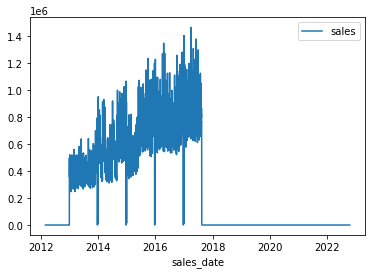

In [47]:
#filter data based on total sales for the dates and plot to visualize sales per date
aggregated_sales_perdate = composite_dataframe.groupby('sales_date', as_index=False)['sales'].sum()

aggregated_sales_perdate.plot(x='sales_date', y='sales', kind='line')

In [48]:
#create columns in the composite_dataframe containing seperate values for the year, month, week and day
composite_dataframe['year'] = pd.to_datetime(composite_dataframe['sales_date']).dt.year
composite_dataframe['month'] = pd.to_datetime(composite_dataframe['sales_date']).dt.month
composite_dataframe['week'] = pd.to_datetime(composite_dataframe['sales_date']).dt.isocalendar().week
composite_dataframe['day'] = pd.to_datetime(composite_dataframe['sales_date']).dt.day

In [49]:
#sort values per year to identify the years with the highest total sales
aggregated_sales_perdate['years'] = pd.to_datetime(aggregated_sales_perdate['sales_date']).dt.year

aggregated_sales_perdate.groupby(['years'], as_index=False)['sales'].max()

,years,sales
0,2012,0
1,2013,792746
2,2014,1064814
3,2015,1233976
4,2016,1345767
5,2017,1462915
6,2022,0


In [50]:
#this function will help in identifying and filtering the highest sales values per month
tmp = aggregated_sales_perdate.groupby(['years'], as_index=False)['sales'].max()

for row in tmp.itertuples():
    musk = (aggregated_sales_perdate['years'] == row.years) & (aggregated_sales_perdate['sales'] == row.sales)
    
    tmp_row = aggregated_sales_perdate.loc[musk]
    
    #t = tmp_row['sales_date'].values
    #s = row.sales
    
    print('Peak sales for', row.years, 'occured on', tmp_row['sales_date'].values, 'for', row.sales, 'items')

Peak sales for 2012 occured on [datetime.date(2012, 3, 2) datetime.date(2012, 4, 1)
 datetime.date(2012, 4, 12) datetime.date(2012, 4, 14)
 datetime.date(2012, 4, 21) datetime.date(2012, 5, 12)
 datetime.date(2012, 6, 23) datetime.date(2012, 6, 25)
 datetime.date(2012, 7, 3) datetime.date(2012, 7, 23)
 datetime.date(2012, 8, 5) datetime.date(2012, 8, 10)
 datetime.date(2012, 8, 15) datetime.date(2012, 8, 24)
 datetime.date(2012, 9, 28) datetime.date(2012, 10, 7)
 datetime.date(2012, 10, 9) datetime.date(2012, 10, 12)
 datetime.date(2012, 11, 2) datetime.date(2012, 11, 3)
 datetime.date(2012, 11, 6) datetime.date(2012, 11, 7)
 datetime.date(2012, 11, 10) datetime.date(2012, 11, 11)
 datetime.date(2012, 11, 12) datetime.date(2012, 12, 5)
 datetime.date(2012, 12, 6) datetime.date(2012, 12, 8)
 datetime.date(2012, 12, 21) datetime.date(2012, 12, 22)
 datetime.date(2012, 12, 23) datetime.date(2012, 12, 24)
 datetime.date(2012, 12, 25) datetime.date(2012, 12, 26)
 datetime.date(2012, 12, 31)

In [51]:
#filter by total highest sales by date
highest_sale = aggregated_sales_perdate.sort_values(by='sales', ascending=False)

In [54]:
#'highest sale per month' represented by hisale_permonth
hisale_permonth = highest_sale.loc[highest_sale.groupby("years")["sales"].idxmax()]

<AxesSubplot:xlabel='sales_date'>

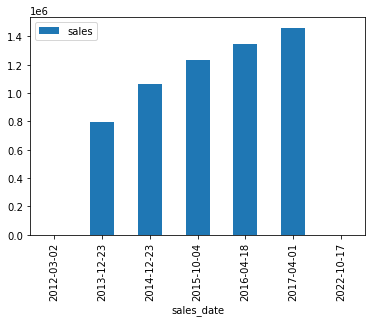

In [55]:
hisale_permonth.plot(x='sales_date', y='sales', kind='bar')

***Inference:***
>from the visualization, corporation favorita often records its highest sales during the christmas festivities, and days boardering around the easter festivities

In [112]:
aggregated_sales_perdate.groupby(['years'], as_index=False)['sales'].min()

,years,sales
0,2012,0
1,2013,0
2,2014,0
3,2015,0
4,2016,0
5,2017,0
6,2022,0


In [59]:
##filter by total lowest sales by date, and also, ignoring the rows with zero
low_sales = aggregated_sales_perdate[aggregated_sales_perdate['sales'] !=0].sort_values(by='sales', ascending=True)

In [60]:
low_sales

,sales_date,sales,years
35,2013-01-01,2508,2013
400,2014-01-01,8596,2014
1496,2017-01-01,12079,2017
765,2015-01-01,12771,2015
1130,2016-01-01,16430,2016
...,...,...,...
1616,2017-05-01,1306539,2017
1238,2016-04-18,1345767,2016
1650,2017-06-04,1376348,2017
1497,2017-01-02,1402131,2017


In [61]:
#filtering to obtain the lowest sales value per year
#'low sale per month' is represented lowsale_permonth
lowsale_permonth = low_sales.loc[low_sales.groupby("years")["sales"].idxmin()]

<AxesSubplot:xlabel='sales_date'>

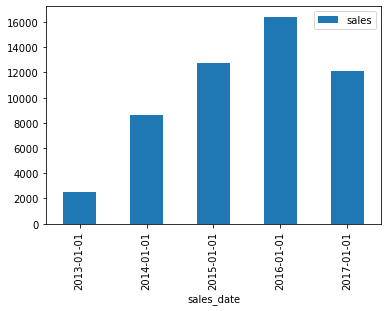

In [63]:
lowsale_permonth.plot(x='sales_date', y='sales', kind='bar')

***Inference:***
>the corporation records its lowest sales usually on 01/01 of each year. Thus, the corporation can structure its promotional activities to attract more customers on that particular day t drive up sales for the day

***Question 3***: Earth Quake vs Sales

In [64]:
#filter the dataframe to identify the sales for the dates before the earthquake and after the earthquake
earthquake = composite_dataframe

earthquake['sales_date'] = earthquake['sales_date'].astype('str')

before_equake = earthquake[(earthquake['sales_date']> '2016-04-01') & (earthquake['sales_date']<= '2016-04-15')]

meansales_beforeearthquake = before_equake.groupby(['sales_date'], as_index=False)['sales'].sum()
meansales_beforeearthquake

,sales_date,sales
0,2016-04-02,1150652
1,2016-04-03,1266758
2,2016-04-04,795096
3,2016-04-05,725597
4,2016-04-06,744629
5,2016-04-07,587781
6,2016-04-08,689574
7,2016-04-09,927825
8,2016-04-10,1008717
9,2016-04-11,665198


In [65]:
#Average sales after earthquake
after_earthquake = earthquake[(earthquake['sales_date']> '2016-04-17') & (earthquake['sales_date']<= '2016-04-30')]
#finding the average of sales for after the earthquake

meansales_afterearthquake = after_earthquake.groupby(['sales_date'], as_index=False)['sales'].sum()

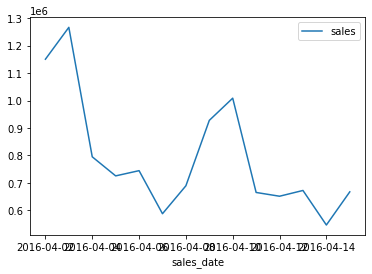

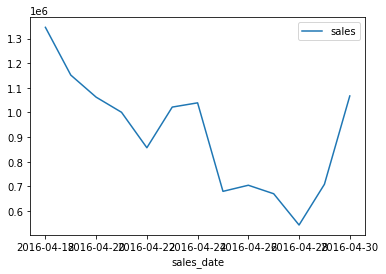

In [67]:
meansales_beforeearthquake.plot( x='sales_date', y='sales', kind='line')
meansales_afterearthquake.plot( x='sales_date', y='sales', kind='line')

plt.show()

***Inference:****
>From the charts, it is evident that sales dipped when the earthquake occured. Thus, it can be concluded that the earthquake affected the sales negatively

***Question 4:*** Store sales per cluster, city, state

<AxesSubplot:xlabel='cluster'>

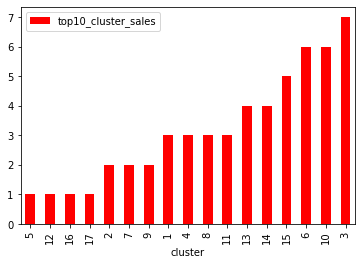

In [72]:
#filter the data to obtain the cluster sales
cluster = composite_dataframe.groupby(by='cluster').sales.agg('count')
cluster_sales = cluster.nsmallest(17).reset_index(name='top10_cluster_sales')
cluster_sales.plot(kind='bar', x='cluster', y='top10_cluster_sales', color='red')

<AxesSubplot:xlabel='city'>

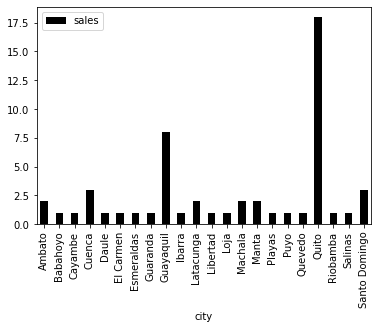

In [73]:
#filter the data to obtain the city with the most sales
city = composite_dataframe.groupby(['city'], as_index=False)['sales'].count() #composite_dataframe.groupby(by='city').sales.agg('count')
city.plot(kind='bar', x='city', y='sales', color='black')

<AxesSubplot:ylabel='state'>

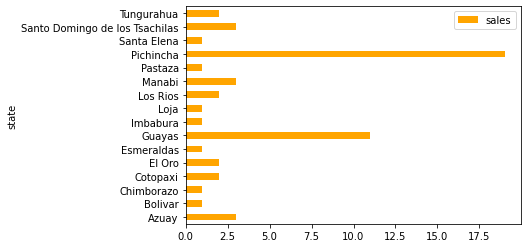

In [74]:
#filter data by sales per state
state = composite_dataframe.groupby(['state'], as_index=False)['sales'].count()
state.plot(kind='barh', x='state', y='sales', color='orange')

***Question 5***: Promotion, Oil Price, & Holiday vs Sales

<AxesSubplot:xlabel='onpromotion', ylabel='sales'>

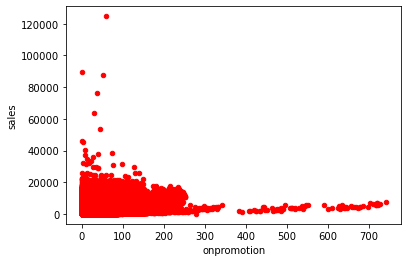

In [75]:
#Plotting a Line Graph Demonstrating the Relationship between Sales and Promotion
composite_dataframe.plot(kind='scatter', x='onpromotion', y='sales', color='red')

***Inference:***
>the promotional activities are able to drive up the sales of coporation favorita

<AxesSubplot:xlabel='sales', ylabel='top10_oil_sales'>

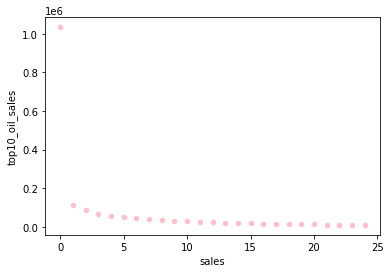

In [80]:
#filter data for the sales by oil
oil_v_sales = composite_dataframe.groupby(['sales'], as_index=False)['price'].count()

saleoil = composite_dataframe.groupby(by='sales').price.agg('count')

sales_to_oil = saleoil.nlargest(25).reset_index(name='top10_oil_sales')

sales_to_oil.plot(kind='scatter', x='sales', y='top10_oil_sales', color='pink')

***Inference:***
>It is clear that the sales activities of coporation favorita is significantly impacted by changes in oil price

<AxesSubplot:xlabel='type'>

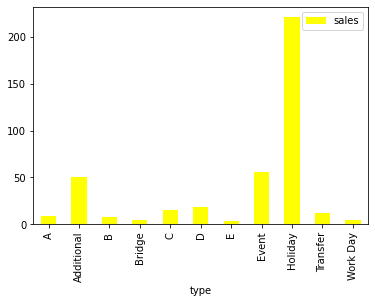

In [84]:
#filter the sales made on the holidays
hol_sale = composite_dataframe.groupby(['type'], as_index=False)['sales'].count()

hol_sale.plot(kind='bar', x='type', y='sales', color='yellow')

***Inference:***
>from the visual, it is evident that coproration favorita is able to make a lot of sales on holidays. Also, sales activities on the additional days are higher as compared to transferred days. Further, transfering the celebration of a holiday to another date does not significantly impact sales. Thus it can be concluded that holidays has a significant impact on the sales activity of the firm. 

# Machine Learning

In [ ]:
#Create a new dataset containing values for the train data

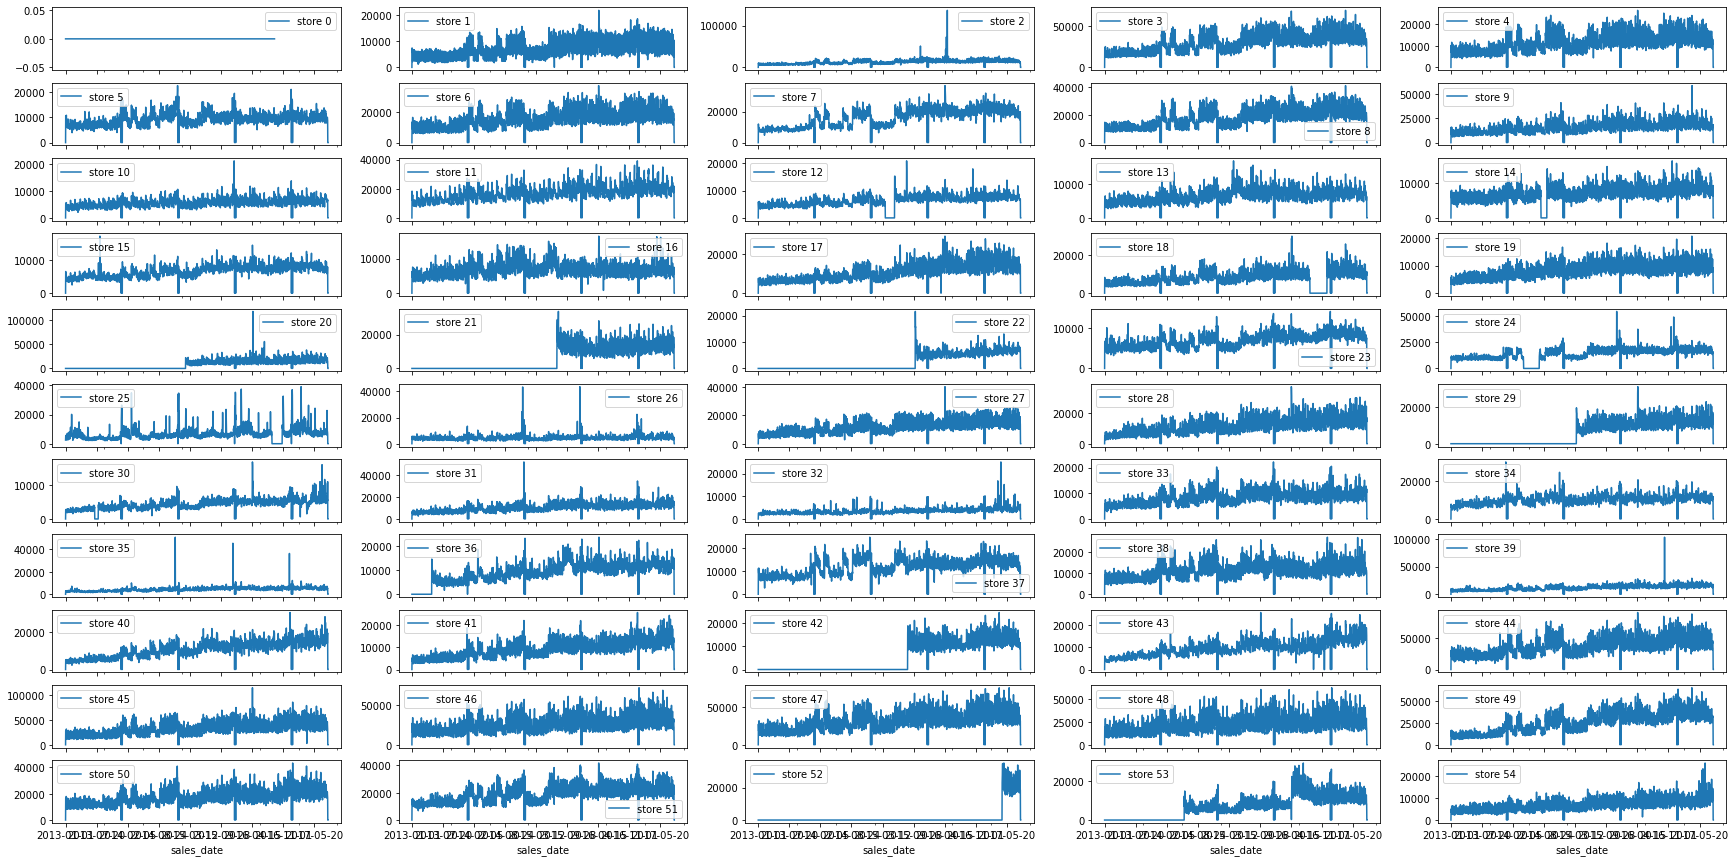

In [85]:
"""with the variable below, we want to define how our canvas will visualize data for all the stores. \
    Given we have 54 stores, we would want the final visual of our data to display 2 columns and 11 rows"""

nrows = 11 #here we want to indicatet the total number of store data to be displayed on a row in our plot
ncols = 5 #here we want to indicate the total number of store data to be displayed on a columns in our plot

#the line of code below specifies how our data would be visualized in on our canvas
fig, axs = plt.subplots(nrows, ncols, figsize=(30,15), sharex=True)
axes = axs.ravel()
q = 0

for name, group in composite_dataframe.groupby('store_nbr'): #this informs us on the name of the group and the actual data('group')
    tmp = group.groupby(['sales_date'], as_index=False)['sales'].sum()#this is to group each store by its total sales/date
    #print(name, '\n', tmp)#over here, the aim is to display the store no., date and total sales made by the store.
    
    tmp.plot('sales_date', 'sales', ax=axes[q])
    axes[q].legend([f'store {name}'])
    q += 1

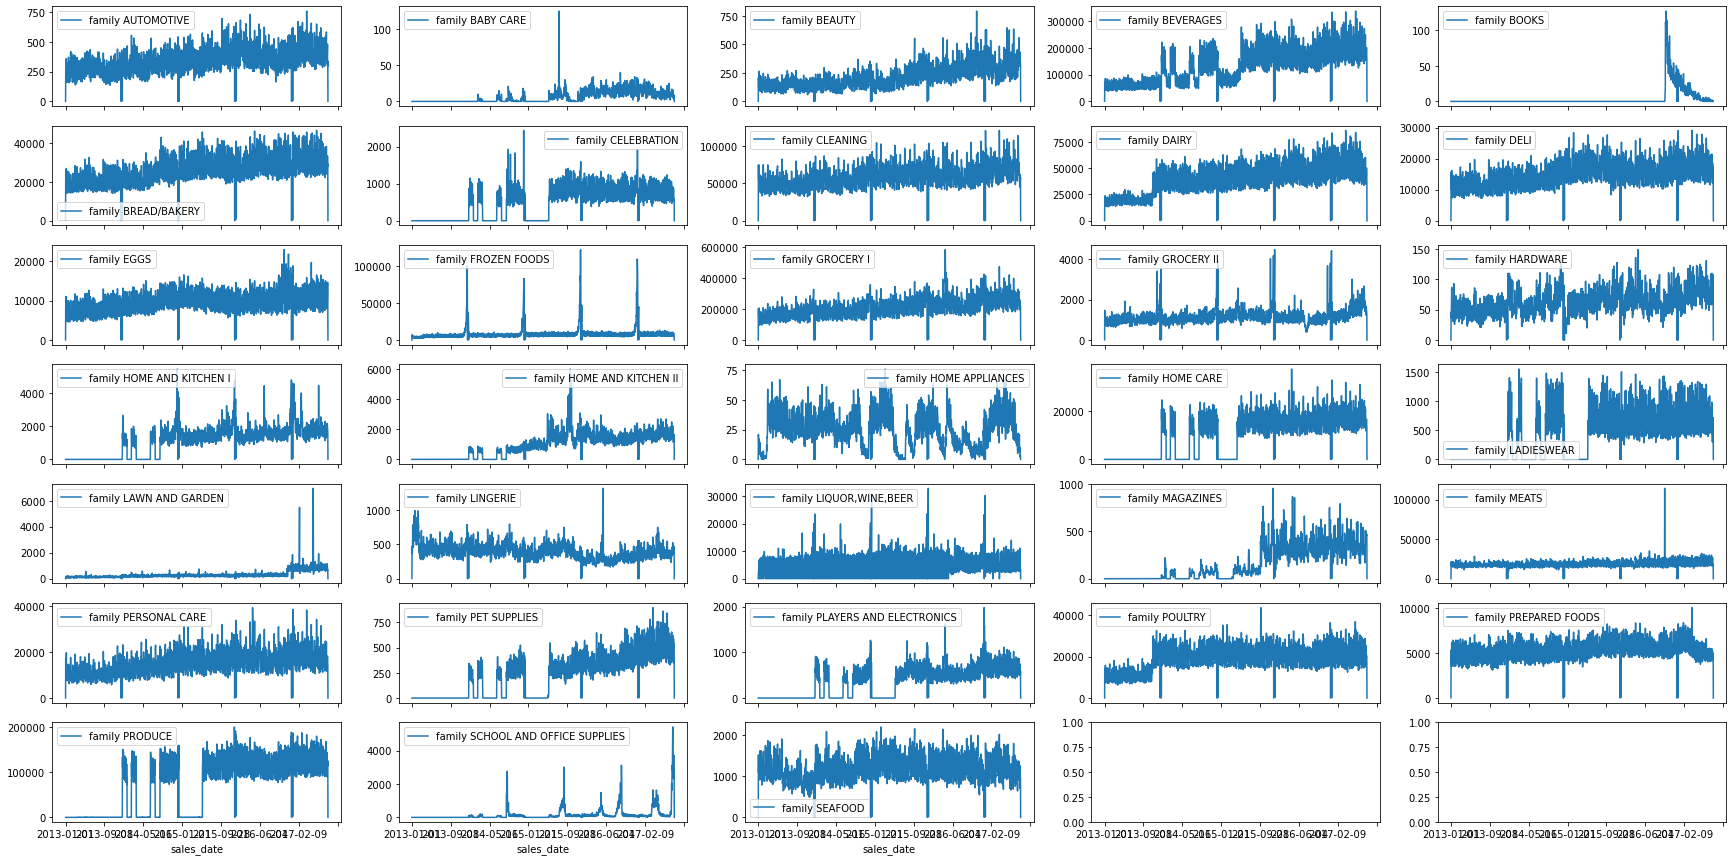

In [86]:
"""with the variable below, we want to define how our canvas will visualize data for all the stores. \
    Given we have 54 stores, we would want the final visual of our data to display 2 columns and 11 rows"""

nrows = 7 #here we want to indicatet the total number of store data to be displayed on a row in our plot
ncols = 5 #here we want to indicate the total number of store data to be displayed on a columns in our plot

#the line of code below specifies how our data would be visualized in on our canvas
fig, axs = plt.subplots(nrows, ncols, figsize=(30,15), sharex=True)
axes = axs.ravel()
q = 0

for name, group in composite_dataframe.groupby('family'): #this informs us on the name of the group and the actual data('group')
    tmp = group.groupby(['sales_date'], as_index=False)['sales'].sum()#this is to group each store by its total sales/date
    #print(name, '\n', tmp)#over here, the aim is to display the store no., date and total sales made by the store.
    
    tmp.plot('sales_date', 'sales', ax=axes[q])
    axes[q].legend([f'family {name}'])
    q += 1

***Dertmining the Best Performing Product Families***

<AxesSubplot:ylabel='family'>

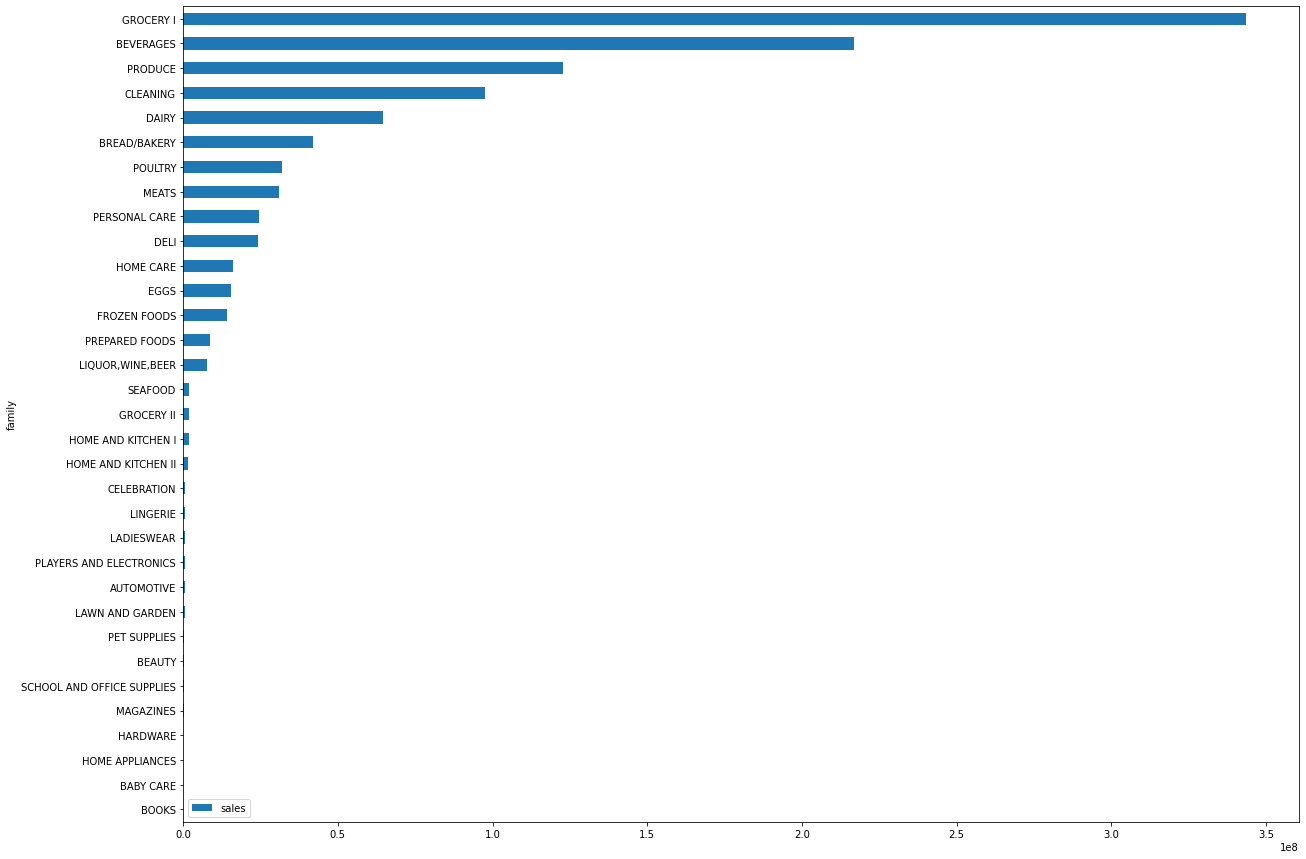

In [87]:
# In order to do this, we would have to group by the product family,determine the total sales and plot it.
composite_dataframe.groupby(['family'], as_index=False)\
    .sum()\
    .sort_values(by='sales')\
    .plot(kind='barh', x='family', y='sales', figsize=(20,15))

***Determining the Best Performing Stores***

<AxesSubplot:ylabel='store_nbr'>

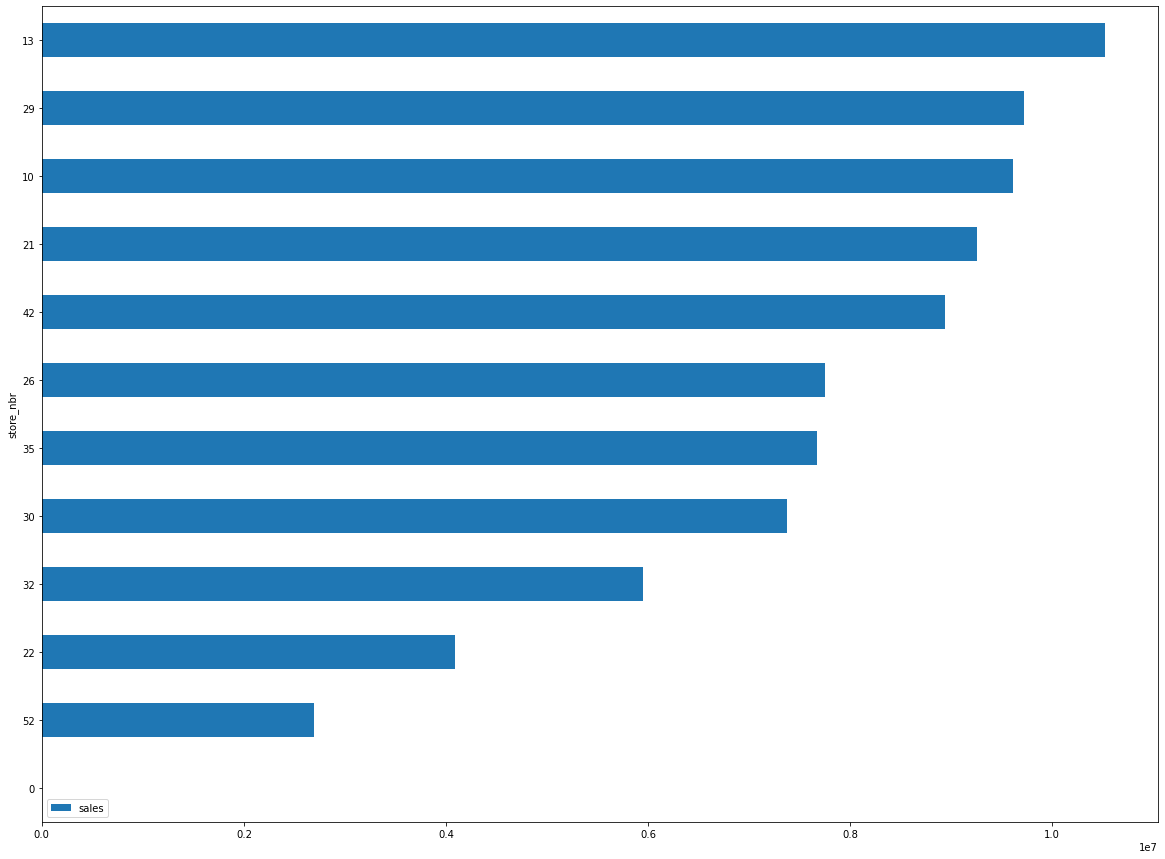

In [88]:
#Store with the Most Sales
# In order to do this, we would have to group by the product store_nbr,determine the total sales and plot it.
composite_dataframe.groupby(['store_nbr'], as_index=False)\
    .sum()\
    .sort_values(by='sales')\
    .iloc[0:12]\
    .plot(kind='barh', x='store_nbr', y='sales', figsize=(20,15))

In [91]:
composite_dataframe.replace(np.nan, 0)



,type,locale,locale_name,transferred,sales_date,date,store_nbr,transactions,city,state,cluster,price,family,sales,onpromotion,year,month,week,day
0,Holiday,Local,Manta,False,2012-03-02,0,0,0,0,0,0,0,0,0,0,2012.0,3.0,9,2.0
1,Holiday,Regional,Cotopaxi,False,2012-04-01,0,0,0,0,0,0,0,0,0,0,2012.0,4.0,13,1.0
2,Holiday,Local,Cuenca,False,2012-04-12,0,0,0,0,0,0,0,0,0,0,2012.0,4.0,15,12.0
3,Holiday,Local,Libertad,False,2012-04-14,0,0,0,0,0,0,0,0,0,0,2012.0,4.0,15,14.0
4,Holiday,Local,Riobamba,False,2012-04-21,0,0,0,0,0,0,0,0,0,0,2012.0,4.0,16,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,0,0,0,0,2017-08-15,0,9,0,0,0,0,0,POULTRY,438,0,2017.0,8.0,33,15.0
3000884,0,0,0,0,2017-08-15,0,9,0,0,0,0,0,PREPARED FOODS,154,1,2017.0,8.0,33,15.0
3000885,0,0,0,0,2017-08-15,0,9,0,0,0,0,0,PRODUCE,2419,148,2017.0,8.0,33,15.0
3000886,0,0,0,0,2017-08-15,0,9,0,0,0,0,0,SCHOOL AND OFFICE SUPPLIES,121,8,2017.0,8.0,33,15.0


In [95]:
train = composite_dataframe[~(composite_dataframe == 0).all(axis=1)] 
#train = composite_dataframe.loc[(composite_dataframe != 0).any(axis=1)] 

In [96]:
train

,type,locale,locale_name,transferred,sales_date,date,store_nbr,transactions,city,state,cluster,price,family,sales,onpromotion,year,month,week,day
0,Holiday,Local,Manta,False,2012-03-02,NaN,0,0,NaN,NaN,0,0,NaN,0,0,2012.0,3.0,9,2.0
1,Holiday,Regional,Cotopaxi,False,2012-04-01,NaN,0,0,NaN,NaN,0,0,NaN,0,0,2012.0,4.0,13,1.0
2,Holiday,Local,Cuenca,False,2012-04-12,NaN,0,0,NaN,NaN,0,0,NaN,0,0,2012.0,4.0,15,12.0
3,Holiday,Local,Libertad,False,2012-04-14,NaN,0,0,NaN,NaN,0,0,NaN,0,0,2012.0,4.0,15,14.0
4,Holiday,Local,Riobamba,False,2012-04-21,NaN,0,0,NaN,NaN,0,0,NaN,0,0,2012.0,4.0,16,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,NaN,NaN,NaN,NaN,2017-08-15,NaN,9,0,NaN,NaN,0,0,POULTRY,438,0,2017.0,8.0,33,15.0
3000884,NaN,NaN,NaN,NaN,2017-08-15,NaN,9,0,NaN,NaN,0,0,PREPARED FOODS,154,1,2017.0,8.0,33,15.0
3000885,NaN,NaN,NaN,NaN,2017-08-15,NaN,9,0,NaN,NaN,0,0,PRODUCE,2419,148,2017.0,8.0,33,15.0
3000886,NaN,NaN,NaN,NaN,2017-08-15,NaN,9,0,NaN,NaN,0,0,SCHOOL AND OFFICE SUPPLIES,121,8,2017.0,8.0,33,15.0


<AxesSubplot:xlabel='month'>

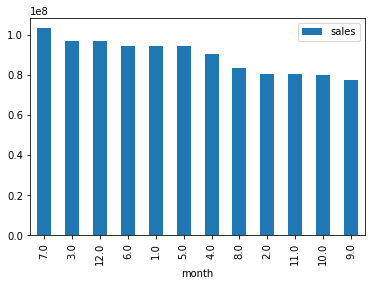

In [89]:
#grouping by months to ascertain the month with the highest sales
composite_dataframe.groupby(['month'], as_index=False)['sales']\
    .sum()\
    .sort_values(by='sales',ascending=False)\
    .plot(kind='bar', x='month', y='sales')

***Inference***
>This suggests that july is the month recording the highest sale across all stores

<AxesSubplot:ylabel='family'>

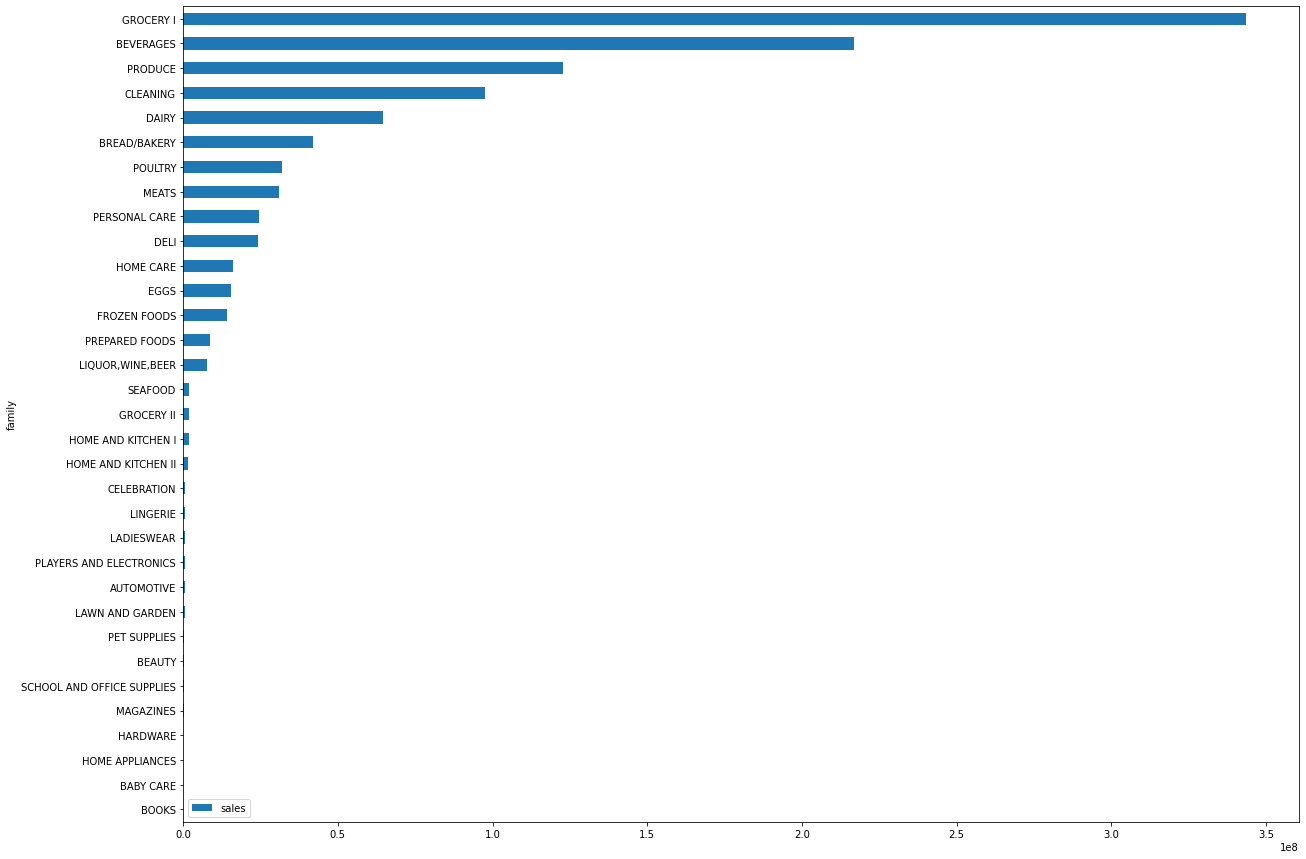

In [158]:
# In order to do this, we would have to group by the product family,determine the total sales and plot it.
composite_dataframe.groupby(['family'], as_index=False)\
    .sum()\
    .sort_values(by='sales')\
    .plot(kind='barh', x='family', y='sales', figsize=(20,15))

<AxesSubplot:xlabel='day'>

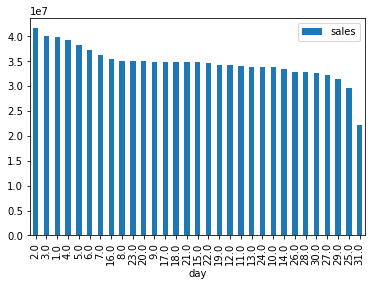

In [90]:
#Determining the highest selling days
composite_dataframe.groupby(['day'], as_index=False)['sales']\
    .sum()\
    .sort_values(by='sales',ascending=False)\
    .plot(kind='bar', x='day', y='sales')

In [161]:
import calendar
calendar.setfirstweekday(6)
def get_week_of_month(year,month,day): #create a function that returns the week on a spacific month regardless of the year
    x = np.array(calendar.monthcalendar(year, month))
    week_of_month = np.where(x==day)[0][0] + 1
    return week_of_month

In [ ]:
# create a function for generating the week of the year
#r = 0

for index, row in composite_dataframe.iterrows():
    date = pd.to_datetime(row['sales_date'])
    
    composite_dataframe.loc[index, 'week_of_month'] = get_week_of_month(date.year, date.month, date.day)
   # print(get_week_of_month(date.year, date.month, date.day))
  #  r+=1
   # if r==4:break

In [ ]:
#Determining by the highest selling week
composite_dataframe.groupby(['week_of_month'], as_index=False)['sales']\
    .sum()\
    .sort_values(by='sales',ascending=False)\
    .plot(kind='bar', x='week_of_month', y='sales')

In [129]:
print(group)

        type locale locale_name transferred  sales_date        date  \
46       NaN    NaN         NaN         NaN  2012-12-19  2013-01-02   
92       NaN    NaN         NaN         NaN  2012-12-20  2013-01-03   
138      NaN    NaN         NaN         NaN  2012-12-21  2013-01-04   
184      NaN    NaN         NaN         NaN  2012-12-22  2013-01-05   
230      NaN    NaN         NaN         NaN  2012-12-23  2013-01-06   
...      ...    ...         ...         ...         ...         ...   
3000751  NaN    NaN         NaN         NaN  2017-08-01         NaN   
3000752  NaN    NaN         NaN         NaN  2017-08-01         NaN   
3000753  NaN    NaN         NaN         NaN  2017-08-01         NaN   
3000754  NaN    NaN         NaN         NaN  2017-08-01         NaN   
3000755  NaN    NaN         NaN         NaN  2017-08-01         NaN   

         store_nbr  transactions city state  cluster  price  \
46              54           998  NaN   NaN        0      0   
92              54   

In [97]:
def getseasons(row):
    if row in (3, 4, 5):
        return 'spring'
    elif row in (6, 7, 8):
        return 'summer'
    elif row in (9,10,11):
        return 'fall'
    elif row in(12, 1, 2):
        return 'winter'

In [98]:
#get the date features

def getDateFeatures(composite_dataframe, date):
    composite_dataframe['sales_date'] = pd.to_datetime(composite_dataframe['sales_date'])
    composite_dataframe['year'] = composite_dataframe['sales_date'].dt.year
    composite_dataframe['day_of_year'] = composite_dataframe['sales_date'].dt.dayofyear
    composite_dataframe['week_of_year'] = composite_dataframe['sales_date'].dt.isocalendar().week
    composite_dataframe['month'] = composite_dataframe['sales_date'].dt.month
    composite_dataframe['day_of_month'] = composite_dataframe['sales_date'].dt.day
    composite_dataframe['week'] = composite_dataframe['sales_date'].dt.isocalendar().week
    #composite_dataframe['quater'] = composite_dataframe['sales_date'].dt.quater
    
    return composite_dataframe
    

In [99]:
train = getDateFeatures(train, 'sales_date')

In [167]:
pd.set_option('display.max_columns', None)

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3094908 entries, 0 to 3000887
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   type          object        
 1   locale        object        
 2   locale_name   object        
 3   transferred   object        
 4   sales_date    datetime64[ns]
 5   date          object        
 6   store_nbr     int32         
 7   transactions  int32         
 8   city          object        
 9   state         object        
 10  cluster       int32         
 11  price         int32         
 12  family        object        
 13  sales         int32         
 14  onpromotion   int32         
 15  year          float64       
 16  month         float64       
 17  week          UInt32        
 18  day           float64       
 19  day_of_year   float64       
 20  week_of_year  UInt32        
 21  day_of_month  float64       
dtypes: UInt32(2), datetime64[ns](1), float64(5), int32(6), object(8)
m

In [101]:
train.drop(columns=['type','locale', 'locale_name', 'transferred', 'sales_date', 'date', 'onpromotion', 'transactions', 'city', 'state', 'cluster', 'price'], inplace=True)

In [191]:
composite_dataframe.apply(pd.to_numeric,errors='coerce')
composite_dataframe

,store_nbr,family,sales,year,month,week,day,day_of_year,week_of_year,day_of_month
0,0,NaN,0,2012.0,2.0,7,24.0,48.0,7,17.0
1,0,NaN,0,2012.0,3.0,11,25.0,78.0,11,18.0
2,0,NaN,0,2012.0,3.0,13,5.0,89.0,13,29.0
3,0,NaN,0,2012.0,3.0,13,7.0,91.0,13,31.0
4,0,NaN,0,2012.0,4.0,14,14.0,98.0,14,7.0
...,...,...,...,...,...,...,...,...,...,...
3000883,9,POULTRY,438,2017.0,8.0,31,8.0,213.0,31,1.0
3000884,9,PREPARED FOODS,154,2017.0,8.0,31,8.0,213.0,31,1.0
3000885,9,PRODUCE,2419,2017.0,8.0,31,8.0,213.0,31,1.0
3000886,9,SCHOOL AND OFFICE SUPPLIES,121,2017.0,8.0,31,8.0,213.0,31,1.0


In [103]:
import seaborn as sns

<AxesSubplot:>

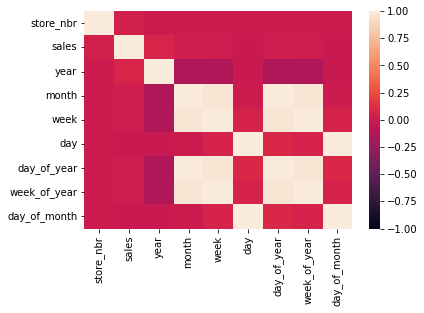

In [104]:
sns.heatmap(train.corr(), vmin=-1)

In [105]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression

In [108]:
train.dropna(subset=['family'])

,store_nbr,family,sales,year,month,week,day,day_of_year,week_of_year,day_of_month
0,1,AUTOMOTIVE,0,2022.0,10.0,42,17.0,290.0,42,17.0
1,1,BABY CARE,0,2022.0,10.0,42,17.0,290.0,42,17.0
2,1,BEAUTY,0,2022.0,10.0,42,17.0,290.0,42,17.0
3,1,BEVERAGES,0,2022.0,10.0,42,17.0,290.0,42,17.0
4,1,BOOKS,0,2022.0,10.0,42,17.0,290.0,42,17.0
...,...,...,...,...,...,...,...,...,...,...
3000883,9,POULTRY,438,2017.0,8.0,33,15.0,227.0,33,15.0
3000884,9,PREPARED FOODS,154,2017.0,8.0,33,15.0,227.0,33,15.0
3000885,9,PRODUCE,2419,2017.0,8.0,33,15.0,227.0,33,15.0
3000886,9,SCHOOL AND OFFICE SUPPLIES,121,2017.0,8.0,33,15.0,227.0,33,15.0


In [109]:
one_hot_encoded_data =pd.get_dummies(train, columns = ['family'])

In [111]:
one_hot_encoded_data

,store_nbr,sales,year,month,week,day,day_of_year,week_of_year,day_of_month,family_AUTOMOTIVE,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,0,0,2012.0,3.0,9,2.0,62.0,9,2.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2012.0,4.0,13,1.0,92.0,13,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2012.0,4.0,15,12.0,103.0,15,12.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2012.0,4.0,15,14.0,105.0,15,14.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2012.0,4.0,16,21.0,112.0,16,21.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,9,438,2017.0,8.0,33,15.0,227.0,33,15.0,0,...,0,0,0,0,0,1,0,0,0,0
3000884,9,154,2017.0,8.0,33,15.0,227.0,33,15.0,0,...,0,0,0,0,0,0,1,0,0,0
3000885,9,2419,2017.0,8.0,33,15.0,227.0,33,15.0,0,...,0,0,0,0,0,0,0,1,0,0
3000886,9,121,2017.0,8.0,33,15.0,227.0,33,15.0,0,...,0,0,0,0,0,0,0,0,1,0


In [110]:
decision_tree_model = DecisionTreeRegressor(random_state=100)

In [112]:
X = one_hot_encoded_data.drop(columns=['sales'])
y = one_hot_encoded_data['sales']

In [113]:
decision_tree_model.fit(X, y)

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values